In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tnrange
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib as mpl
import scipy

In [16]:
pre_na_sub = np.load("/scratch/yjk27/CA1_clust4-60/mono/gru_s5_h20_output.npz")["sub_out"]
pre_nona_sub = np.load("/scratch/yjk27/CA1_clust4-60_noNA/mono/gru_s5_h20_output.npz")["sub_out"]
post_na_sub = np.load("/scratch/yjk27/CA1_clust4-60_AP/comb_pred/gru_l20_h40_0.2ms_V_test_joint_output.npz")["na_sub_out"]
post_nona_sub = np.load("/scratch/yjk27/CA1_clust4-60_AP/comb_pred/gru_l20_h40_0.2ms_V_test_joint_output.npz")["nona_sub_out"]

In [17]:
spk = np.load("/scratch/yjk27/CA1_clust4-60_AP/data/spike_train_0.2ms.npy")[980*50000:].reshape(20,50000)

pre_wind = 10 * 5
post_wind = 50 * 5

pre_na_sub_spk_avg = np.zeros((4, pre_wind + post_wind))
pre_nona_sub_spk_avg = np.zeros((4, pre_wind + post_wind))
post_na_sub_spk_avg = np.zeros((4, pre_wind + post_wind))
post_nona_sub_spk_avg = np.zeros((4, pre_wind + post_wind))

pre_na_sub_spk = np.zeros((4, 6, pre_wind + post_wind))
pre_nona_sub_spk = np.zeros((4, 6, pre_wind + post_wind))
post_na_sub_spk = np.zeros((4, 6, pre_wind + post_wind))
post_nona_sub_spk = np.zeros((4, 6, pre_wind + post_wind))

for i in range(20):
    spk_idx = np.where(spk[i] == 1)[0]
    for s in range(spk_idx.size):
        if s < spk_idx.size-1:
            if (spk_idx[s+1] - spk_idx[s] < 2 * 5):
                next_close = True
                print(spk_idx[s], spk_idx[s+1])
            else:
                next_close = False
        elif s == spk_idx.size-1:
            next_close = False
            
                
        if next_close:
            interval = spk_idx[s+1] - spk_idx[s] - 2*5
            pre_na_sub_spk_avg[:,:interval] += pre_na_sub[i,1:,spk_idx[s]-pre_wind:spk_idx[s] + interval]
            pre_nona_sub_spk_avg[:,:interval] += pre_nona_sub[i,1:,spk_idx[s]-pre_wind:spk_idx[s] + interval]
            post_na_sub_spk_avg[:,:interval] += post_na_sub[i,1:,spk_idx[s]-pre_wind:spk_idx[s] + interval]
            post_nona_sub_spk_avg[:,:interval] += post_nona_sub[i,1:,spk_idx[s]-pre_wind:spk_idx[s] + interval]
            
            if s < 6:
                pre_na_sub_spk[:,s,:interval] = pre_na_sub[i,1:,spk_idx[s]-pre_wind:spk_idx[s] + interval]
                pre_nona_sub_spk[:,s,:interval] = pre_nona_sub[i,1:,spk_idx[s]-pre_wind:spk_idx[s] + interval]
                post_na_sub_spk[:,s,:interval] = post_na_sub[i,1:,spk_idx[s]-pre_wind:spk_idx[s] + interval]
                post_nona_sub_spk[:,s,:interval] = post_nona_sub[i,1:,spk_idx[s]-pre_wind:spk_idx[s] + interval]
            
        elif not next_close:
            pre_na_sub_spk_avg += pre_na_sub[i,1:,spk_idx[s]-pre_wind:spk_idx[s]+post_wind]
            pre_nona_sub_spk_avg += pre_nona_sub[i,1:,spk_idx[s]-pre_wind:spk_idx[s]+post_wind]
            post_na_sub_spk_avg += post_na_sub[i,1:,spk_idx[s]-pre_wind:spk_idx[s]+post_wind]
            post_nona_sub_spk_avg += post_nona_sub[i,1:,spk_idx[s]-pre_wind:spk_idx[s]+post_wind]
            
            if s < 6:
                pre_na_sub_spk[:,s] = pre_na_sub[i,1:,spk_idx[s]-pre_wind:spk_idx[s]+post_wind]
                pre_nona_sub_spk[:,s] = pre_nona_sub[i,1:,spk_idx[s]-pre_wind:spk_idx[s]+post_wind]
                post_na_sub_spk[:,s] = post_na_sub[i,1:,spk_idx[s]-pre_wind:spk_idx[s]+post_wind]
                post_nona_sub_spk[:,s] = post_nona_sub[i,1:,spk_idx[s]-pre_wind:spk_idx[s]+post_wind]
            
pre_na_sub_spk_avg /= np.sum(spk)
pre_nona_sub_spk_avg /= np.sum(spk)
post_na_sub_spk_avg /= np.sum(spk)
post_nona_sub_spk_avg /= np.sum(spk)

<ipython-input-20-bfaf167e65c7>:127: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


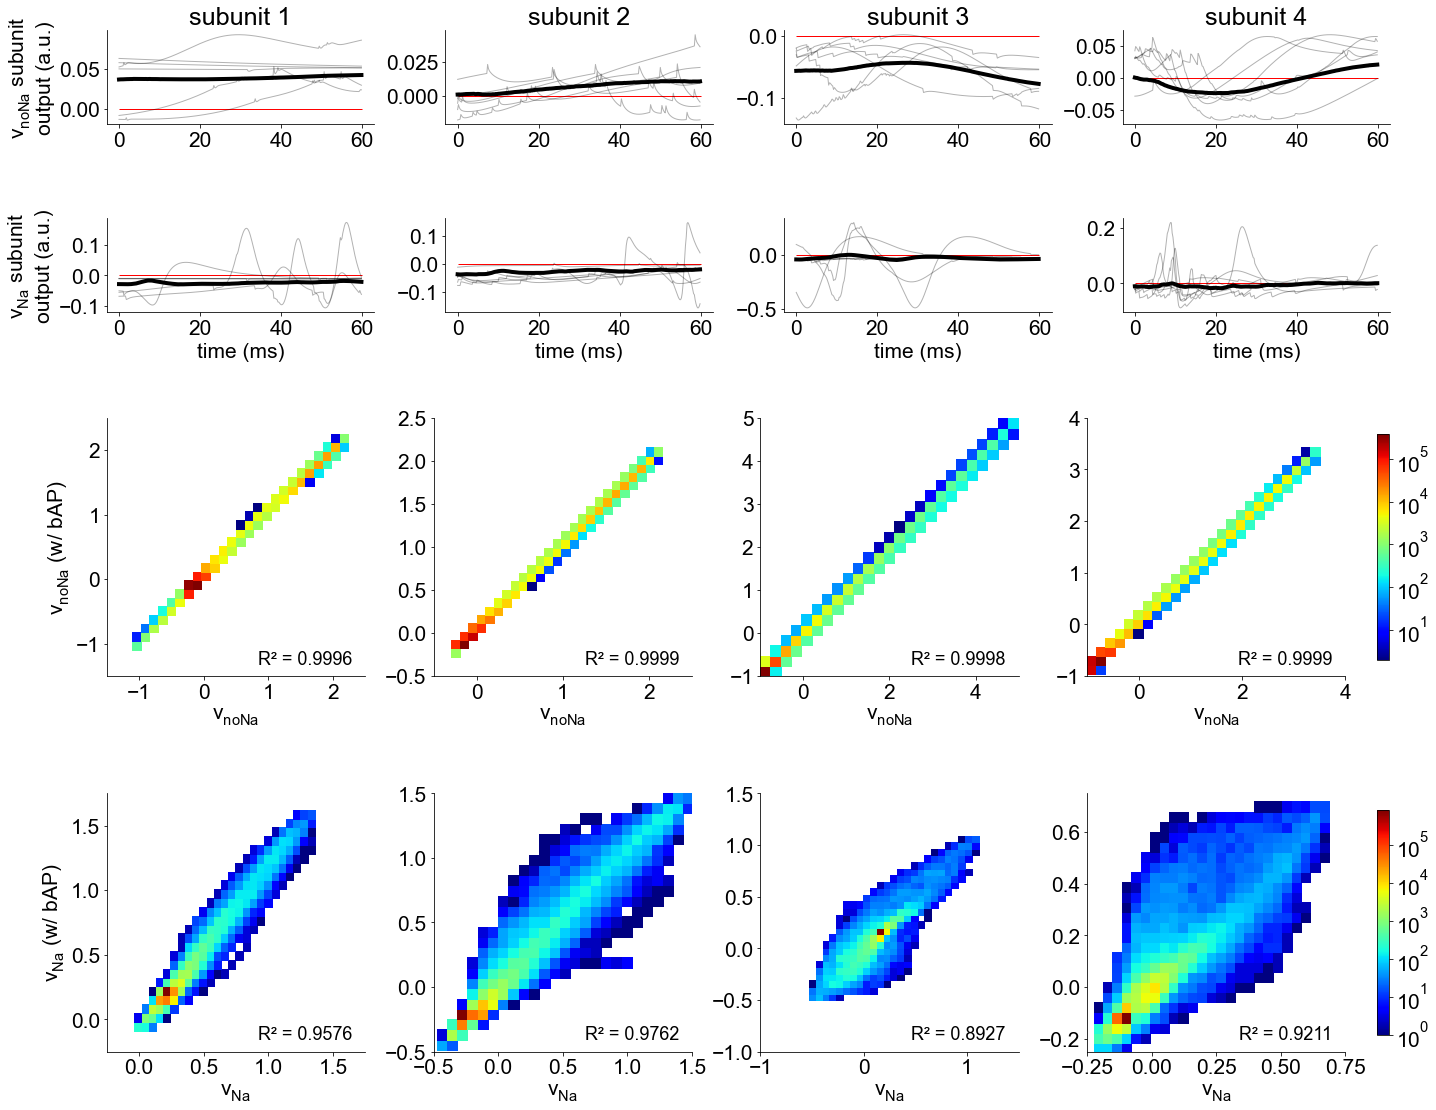

In [20]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.size'] = '21'

fig = plt.figure(figsize = (23,19))
gs = fig.add_gridspec(6,12, wspace=1.7, hspace=1)

ax41 = fig.add_subplot(gs[2:4,:3])
ax42 = fig.add_subplot(gs[2:4,3:6])
ax43 = fig.add_subplot(gs[2:4,6:9])
ax44 = fig.add_subplot(gs[2:4,9:])
ax51 = fig.add_subplot(gs[4:6,:3])
ax52 = fig.add_subplot(gs[4:6,3:6])
ax53 = fig.add_subplot(gs[4:6,6:9])
ax54 = fig.add_subplot(gs[4:6,9:])

ax61 = fig.add_subplot(gs[0,:3])
ax62 = fig.add_subplot(gs[0,3:6])
ax63 = fig.add_subplot(gs[0,6:9])
ax64 = fig.add_subplot(gs[0,9:])
ax71 = fig.add_subplot(gs[1,:3])
ax72 = fig.add_subplot(gs[1,3:6])
ax73 = fig.add_subplot(gs[1,6:9])
ax74 = fig.add_subplot(gs[1,9:])

###################
nona_ax_list = [ax41, ax42, ax43, ax44]
na_ax_list = [ax51, ax52, ax53, ax54]

for i in range(4):
    _,_,_,nona_img = nona_ax_list[i].hist2d(pre_nona_sub[:,i+1].flatten(),
              post_nona_sub[:,i+1].flatten(), cmap="jet",
                           norm=mpl.colors.LogNorm(), bins=25)
    _,_,_,na_img = na_ax_list[i].hist2d(pre_na_sub[:,i+1].flatten(),
              post_na_sub[:,i+1].flatten(), cmap="jet",
                         norm=mpl.colors.LogNorm(), bins=25)
    
    nona_ax_list[i].spines['right'].set_visible(False)
    nona_ax_list[i].spines['top'].set_visible(False)
    nona_ax_list[i].set_aspect(1)
    nona_ax_list[i].set_xlabel("$\mathregular{v_{noNa}}$")
    #nona_ax_list[i].set_title("subunit "+str(i+1))
    
    na_ax_list[i].spines['right'].set_visible(False)
    na_ax_list[i].spines['top'].set_visible(False)
    na_ax_list[i].set_aspect(1)
    na_ax_list[i].set_xlabel("$\mathregular{v_{Na}}$")
    
    if i == 0:
        nona_ax_list[i].set_ylabel("$\mathregular{v_{noNa}}$ (w/ bAP)")
        na_ax_list[i].set_ylabel("$\mathregular{v_{Na}}$ (w/ bAP)")                             
    
    nona_corr = np.corrcoef(pre_nona_sub[:,i+1].flatten(), post_nona_sub[:,i+1].flatten())[0,1]
    na_corr = np.corrcoef(pre_na_sub[:,i+1].flatten(), post_na_sub[:,i+1].flatten())[0,1]
    nona_ax_list[i].annotate("R² = "+str(np.round(nona_corr,4)), xy=(0.95,0.1),  xycoords='axes fraction',
            size=18, ha='right', va='top')
    na_ax_list[i].annotate("R² = "+str(np.round(na_corr,4)), xy=(0.95,0.1),  xycoords='axes fraction',
            size=18, ha='right', va='top')
    
    if i == 3:
        cbar = fig.colorbar(nona_img, ax=nona_ax_list, shrink=0.8, pad=0.025, fraction=0.01,
                             ticks=[1,10,100,1000,10000,100000,1000000])
        cbar.ax.set_yticklabels(["$\mathregular{10^0}$","$\mathregular{10^1}$",
                         "$\mathregular{10^2}$","$\mathregular{10^3}$",
                         "$\mathregular{10^4}$","$\mathregular{10^5}$","$\mathregular{10^6}$"])
        cbar = fig.colorbar(na_img, ax=na_ax_list, shrink=0.8, pad=0.025, fraction=0.01,
                            ticks=[1,10,100,1000,10000,100000,1000000])
        cbar.ax.set_yticklabels(["$\mathregular{10^0}$","$\mathregular{10^1}$",
                         "$\mathregular{10^2}$","$\mathregular{10^3}$",
                         "$\mathregular{10^4}$","$\mathregular{10^5}$","$\mathregular{10^6}$"])
        
    if i == 0:
        nona_ax_list[i].set_xlim(-1.5,2.5)
        nona_ax_list[i].set_ylim(-1.5,2.5)
        na_ax_list[i].set_xlim(-0.25,1.75)
        na_ax_list[i].set_ylim(-0.25,1.75)
    elif i == 1:
        nona_ax_list[i].set_xlim(-0.5,2.5)
        nona_ax_list[i].set_ylim(-0.5,2.5)
        na_ax_list[i].set_xlim(-0.5,1.5)
        na_ax_list[i].set_ylim(-0.5,1.5)
    elif i == 2:
        nona_ax_list[i].set_xlim(-1,5)
        nona_ax_list[i].set_ylim(-1,5)
        na_ax_list[i].set_xlim(-1,1.5)
        na_ax_list[i].set_ylim(-1,1.5)
    elif i == 3:
        nona_ax_list[i].set_xlim(-1,4)
        nona_ax_list[i].set_ylim(-1,4)
        na_ax_list[i].set_xlim(-0.25,0.75)
        na_ax_list[i].set_ylim(-0.25,0.75)
    
##############
nona_ax_list = [ax61, ax62, ax63, ax64]
na_ax_list = [ax71, ax72, ax73, ax74]
for i in range(4):
    nona_ax = nona_ax_list[i]
    na_ax = na_ax_list[i]
    
    nona_ax.plot(np.arange(0,60,0.2), post_nona_sub_spk_avg[i] - pre_nona_sub_spk_avg[i], linewidth=4, color="black",
                 label="$\mathregular{v_{noNa}}$\n+$\mathregular{v_{Na}}$")
    
    na_ax.plot(np.arange(0,60,0.2), post_na_sub_spk_avg[i]-pre_na_sub_spk_avg[i], linewidth=4, color="black")
    
    if i == 0:
        nona_ax.set_ylabel("$\mathregular{v_{noNa}}$ subunit\noutput (a.u.)")
        na_ax.set_ylabel("$\mathregular{v_{Na}}$ subunit\noutput (a.u.)")
    
    na_ax.set_xlabel("time (ms)")
    
    nona_ax.spines['right'].set_visible(False)
    nona_ax.spines['top'].set_visible(False)
    na_ax.spines['right'].set_visible(False)
    na_ax.spines['top'].set_visible(False)
    
    nona_ax.set_title("subunit "+str(i+1))
    
    nona_ax.hlines(y=0, xmin=0, xmax=60, linewidth=1, color="red")
    na_ax.hlines(y=0, xmin=0, xmax=60, linewidth=1, color="red")
    
    for x in range(6):
        nona_ax.plot(np.arange(0,60,0.2), post_nona_sub_spk[i,x]-pre_nona_sub_spk[i,x], linewidth=1, color="black", alpha=0.3)
        
        na_ax.plot(np.arange(0,60,0.2), post_na_sub_spk[i,x]-pre_na_sub_spk[i,x], linewidth=1, color="black", alpha=0.3)
    
fig.tight_layout()
#plt.show()
#fig.savefig("/scratch/yjk27/dendrite/fig_ap/fig_ap_axosoma_raw.pdf", bbox_inches="tight", transparent=True)
